In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

import pandas as pd

df = pd.read_csv('dataset.csv', engine='python', on_bad_lines='skip')

In [2]:
!pip install pandas numpy nltk spacy gensim scikit-learn matplotlib pyLDAvis transformers
!python -m spacy download en_core_web_sm


  Using cached transformers-4.47.0-py3-none-any.whl.metadata (43 kB)
  Using cached huggingface_hub-0.26.5-py3-none-any.whl.metadata (13 kB)
  Using cached tokenizers-0.21.0-cp39-abi3-win_amd64.whl.metadata (6.9 kB)
  Using cached safetensors-0.4.5-cp312-none-win_amd64.whl.metadata (3.9 kB)
INFO: pip is looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
  Using cached thinc-8.3.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached thinc-8.3.0-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached scipy-1.13.1-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.13.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
INFO: pip is still looking at multiple versions of thinc to determine which version is compatible with other requirements. This could take a while.
  Using cached scipy-1.12.0-cp312-cp312-win_amd64.whl.metadata (60 kB)
  Using cached scipy-1.11.4-cp312-cp312-win_amd64.whl.metadata (6

  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [21 lines of output]
      + meson setup C:\Users\Shahzad\AppData\Local\Temp\pip-install-a2kjizw9\scipy_fcca802d6bd240f9b2b5c95d62dd5d0f C:\Users\Shahzad\AppData\Local\Temp\pip-install-a2kjizw9\scipy_fcca802d6bd240f9b2b5c95d62dd5d0f\.mesonpy-_0_4_cyd\build -Dbuildtype=release -Db_ndebug=if-release -Db_vscrt=md --native-file=C:\Users\Shahzad\AppData\Local\Temp\pip-install-a2kjizw9\scipy_fcca802d6bd240f9b2b5c95d62dd5d0f\.mesonpy-_0_4_cyd\build\meson-python-native-file.ini
      The Meson build system
      Version: 1.6.0
      Source dir: C:\Users\Shahzad\AppData\Local\Temp\pip-install-a2kjizw9\scipy_fcca802d6bd240f9b2b5c95d62dd5d0f
      Build dir: C:\Users\Shahzad\AppData\Local\Temp\pip-install-a2kjizw9\scipy_fcca802d6bd240f9b2b5c95d62dd5d0f\.mesonpy-_0_4_cyd\build
      Build type: native build
      Project name: SciPy
      Project version: 1.11.1
      


     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.5/12.8 MB 2.8 MB/s eta 0:00:05
     --- ------------------------------------ 1.0/12.8 MB 2.5 MB/s eta 0:00:05
     ----- ---------------------------------- 1.8/12.8 MB 3.0 MB/s eta 0:00:04
     ------- -------------------------------- 2.4/12.8 MB 3.0 MB/s eta 0:00:04
     ---------- ----------------------------- 3.4/12.8 MB 3.4 MB/s eta 0:00:03
     ------------ --------------------------- 3.9/12.8 MB 3.4 MB/s eta 0:00:03
     --------------- ------------------------ 5.0/12.8 MB 3.4 MB/s eta 0:00:03
     ------------------ --------------------- 5.8/12.8 MB 3.6 MB/s eta 0:00:02
     ------------------- -------------------- 6.3/12.8 MB 3.5 MB/s eta 0:00:02
     ---------------------- ----------------- 7.1/12.8 MB 3.4 MB/s eta 0:00:02
     ------------------------ --------------- 7.9/12.8 MB 3.4 MB/s eta 0:00:02
     --------------------------- ------------ 8.7/12.8 MB 3

In [3]:
import numpy as np
import nltk
import spacy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import gensim.downloader as api
import pyLDAvis
import pyLDAvis.gensim as gensimvis
from gensim import corpora
import gensim

In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shahzad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\Shahzad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shahzad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [5]:
# Load the dataset
import pandas as pd
import csv
df = pd.read_csv('dataset.csv', engine='python', on_bad_lines='skip')
print(df.head())

  # Check the first few rows of the data


         ID                                         Resume_str  \
0  16852973           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1  22323967           HR SPECIALIST, US HR OPERATIONS      ...   
2  33176873           HR DIRECTOR       Summary      Over 2...   
3  27018550           HR SPECIALIST       Summary    Dedica...   
4  17812897           HR MANAGER         Skill Highlights  ...   

                                         Resume_html Category  
0  <div class="fontsize fontface vmargins hmargin...       HR  
1  <div class="fontsize fontface vmargins hmargin...       HR  
2  <div class="fontsize fontface vmargins hmargin...       HR  
3  <div class="fontsize fontface vmargins hmargin...       HR  
4  <div class="fontsize fontface vmargins hmargin...       HR  


In [6]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pandas as pd

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if text is None:
        return ""

    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

df['cleaned_resume'] = df['Resume_str'].apply(preprocess_text)

print(df[['Resume_str', 'cleaned_resume']].head())


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shahzad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shahzad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shahzad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


                                          Resume_str  \
0           HR ADMINISTRATOR/MARKETING ASSOCIATE\...   
1           HR SPECIALIST, US HR OPERATIONS      ...   
2           HR DIRECTOR       Summary      Over 2...   
3           HR SPECIALIST       Summary    Dedica...   
4           HR MANAGER         Skill Highlights  ...   

                                      cleaned_resume  
0  hr associate hr administrator summary dedicate...  
1  hr specialist u hr operation summary versatile...  
2  hr director summary year experience recruiting...  
3  hr specialist summary dedicated driven dynamic...  
4  hr manager skill highlight hr skill hr departm...  


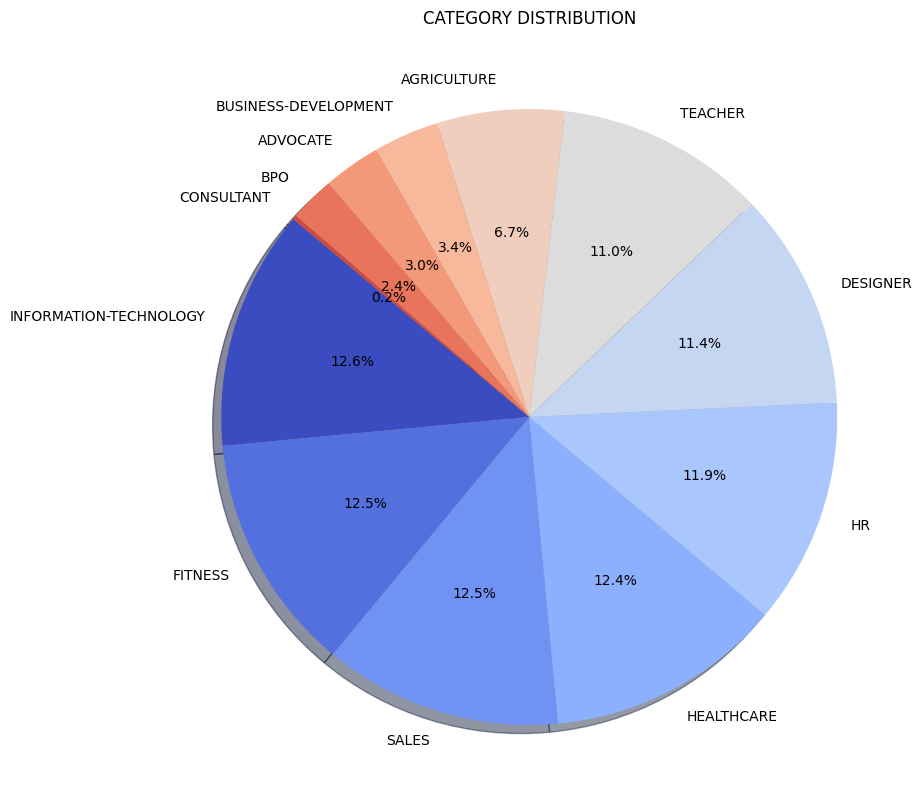

In [7]:
targetCounts = df['Category'].value_counts()
targetLabels = targetCounts.index

plt.figure(1, figsize=(22, 22))
the_grid = GridSpec(2, 2)

cmap = plt.get_cmap('coolwarm')
colors = [cmap(i / len(targetCounts)) for i in range(len(targetCounts))]

plt.subplot(the_grid[0, 1], aspect=1, title='CATEGORY DISTRIBUTION')
plt.pie(targetCounts, labels=targetLabels, autopct='%1.1f%%', shadow=True, colors=colors, startangle=140)

plt.show()

In [8]:
X = df['cleaned_resume']
y = df['Category']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)


In [9]:
word2vec_model = api.load("word2vec-google-news-300")

def vectorize_with_word2vec(text, model):
    words = text.split()
    vectors = [model[word] for word in words if word in model]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

X_train_vec = np.array([vectorize_with_word2vec(text, word2vec_model) for text in X_train])
X_test_vec = np.array([vectorize_with_word2vec(text, word2vec_model) for text in X_test])


In [10]:
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train_vec, y_train)

y_pred = classifier.predict(X_test_vec)
print("RandomForest Classifier: ", y_pred)

RandomForest Classifier:  [ 9  1  5  9 11  7  6  7  9  5  9  5  5  6  7 10  5 10 11  5 10 11  8  8
  7  6  6  9  5  5  9  9  8 11  5  9  9  5 11  8  3  5  9  7  9  7 10  7
  9  7  9  8  8 10  8  5  9  5 10  9  6 10 11 10  8 10  9  9 11 10  6  6
 10 10  7 10  9  8  9 11  9 11  6  7  7  7  8  6  8 10  5  5 10 10  5  6
  5 10  6  1  5  5  6  8  5  8  6  6  6 10 11  7  8  6  9 11  8 10  7 10
 10  6  6  7  6  7  6 10  7  1  7  7 11 10 11 10  8 10  6 10  6  5  7  7
  1  9  6  6  8  6  1 11 10 11  7  6  5  9 12  1 10 11 10  6  7  3  7  9
  8  8  7 11 10  9 10  8  5  9  9  7  7 10  6  6  8 11  5]


In [11]:
y_pred = classifier.predict(X_test_vec)

from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))  # Accuracy score

Accuracy: 0.6577540106951871


In [12]:
processed_text = df['cleaned_resume'].apply(lambda x: x.split())  # Tokenize text for LDA

dictionary = corpora.Dictionary(processed_text)
corpus = [dictionary.doc2bow(text) for text in processed_text]

lda_model = gensim.models.LdaMulticore(corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

lda_vis = gensimvis.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(lda_vis)


Accuracy: 0.6577540106951871
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.50      0.25      0.33        12
           2       0.00      0.00      0.00         4
           3       0.50      0.10      0.17        10
           4       0.00      0.00      0.00         1
           5       0.79      0.79      0.79        24
           6       0.45      0.62      0.52        21
           7       0.67      0.78      0.72        23
           8       0.76      0.94      0.84        17
           9       0.78      0.78      0.78        27
          10       0.59      0.76      0.67        25
          11       0.67      0.71      0.69        17
          12       1.00      1.00      1.00         1

    accuracy                           0.66       187
   macro avg       0.52      0.52      0.50       187
weighted avg       0.62      0.66      0.62       187



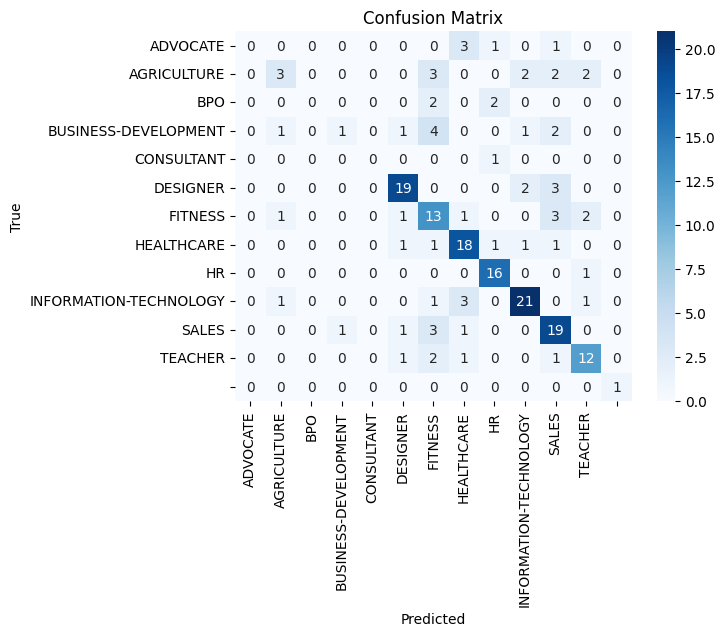

In [13]:
from sklearn.metrics import classification_report, accuracy_score
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))

from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

pre-trained model using API


In [14]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
import gensim.downloader as api

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

df = pd.read_csv('dataset.csv', engine='python', on_bad_lines='skip')
df = df.dropna(subset=['Resume_str', 'Category'])

def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)
    words = [word for word in words if word.isalpha()]
    words = [word for word in words if word not in stop_words]
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

df['cleaned_resume'] = df['Resume_str'].apply(preprocess_text)

label_encoder = LabelEncoder()
df['Category_encoded'] = label_encoder.fit_transform(df['Category'])

X = df['cleaned_resume']
y = df['Category_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Loading Word2Vec model...")
word2vec_model = api.load("word2vec-google-news-300")

def vectorize_with_word2vec(text, model):
    words = text.split()
    vectors = [model[word] for word in words if word in model]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

X_train_vec = np.array([vectorize_with_word2vec(text, word2vec_model) for text in X_train])
X_test_vec = np.array([vectorize_with_word2vec(text, word2vec_model) for text in X_test])

model = Sequential([
    Dense(128, activation='relu', input_shape=(300,)),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(label_encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

print("Training the model...")
history = model.fit(X_train_vec, y_train, epochs=30, batch_size=32, validation_split=0.2, verbose=1)

test_loss, test_accuracy = model.evaluate(X_test_vec, y_test, verbose=1)
print(f"Test Accuracy: {test_accuracy:.4f}")

y_pred = model.predict(X_test_vec).argmax(axis=1)
target_names = label_encoder.classes_
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=target_names))


<frozen importlib._bootstrap>:488: DeprecationWarning: Type google._upb._message.MessageMapContainer uses PyType_Spec with a metaclass that has custom tp_new. This is deprecated and will no longer be allowed in Python 3.14.
<frozen importlib._bootstrap>:488: DeprecationWarning: Type google._upb._message.ScalarMapContainer uses PyType_Spec with a metaclass that has custom tp_new. This is deprecated and will no longer be allowed in Python 3.14.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shahzad\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shahzad\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shahzad\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Loading Word2Vec model...


a:\Python\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the model...
Epoch 1/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step - accuracy: 0.1215 - loss: 2.4545 - val_accuracy: 0.1544 - val_loss: 2.3557
Epoch 2/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.1537 - loss: 2.3261 - val_accuracy: 0.3087 - val_loss: 2.2747
Epoch 3/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.1707 - loss: 2.2509 - val_accuracy: 0.3490 - val_loss: 2.2306
Epoch 4/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2229 - loss: 2.2021 - val_accuracy: 0.3960 - val_loss: 2.1458
Epoch 5/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3478 - loss: 2.0776 - val_accuracy: 0.4161 - val_loss: 2.0687
Epoch 6/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3823 - loss: 1.9718 - val_accuracy: 0.4295 - val_loss: 1.9900
Epoch 7/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4197 - loss: 1.9077 - val_accuracy: 0.4362 - val_loss: 1.9110
Epoch 8/30
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4078 - loss: 1.9335 - va

a:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
a:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
a:\Python\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Classification Report:
                         precision    recall  f1-score   support

              ADVOCATE       0.00      0.00      0.00         4
           AGRICULTURE       0.71      0.42      0.53        12
                   BPO       0.00      0.00      0.00         6
  BUSINESS-DEVELOPMENT       0.00      0.00      0.00        11
            CONSULTANT       0.00      0.00      0.00         1
              DESIGNER       0.82      0.67      0.74        21
               FITNESS       0.82      0.64      0.72        22
            HEALTHCARE       0.55      0.50      0.52        22
                    HR       0.55      1.00      0.71        16
INFORMATION-TECHNOLOGY       0.75      0.97      0.85        31
                 SALES       0.67      0.88      0.76        25
               TEACHER       0.61      0.93      0.74        15

              accuracy                           0.68       186
             macro avg       0.46      0.50      0.46       186
          weig

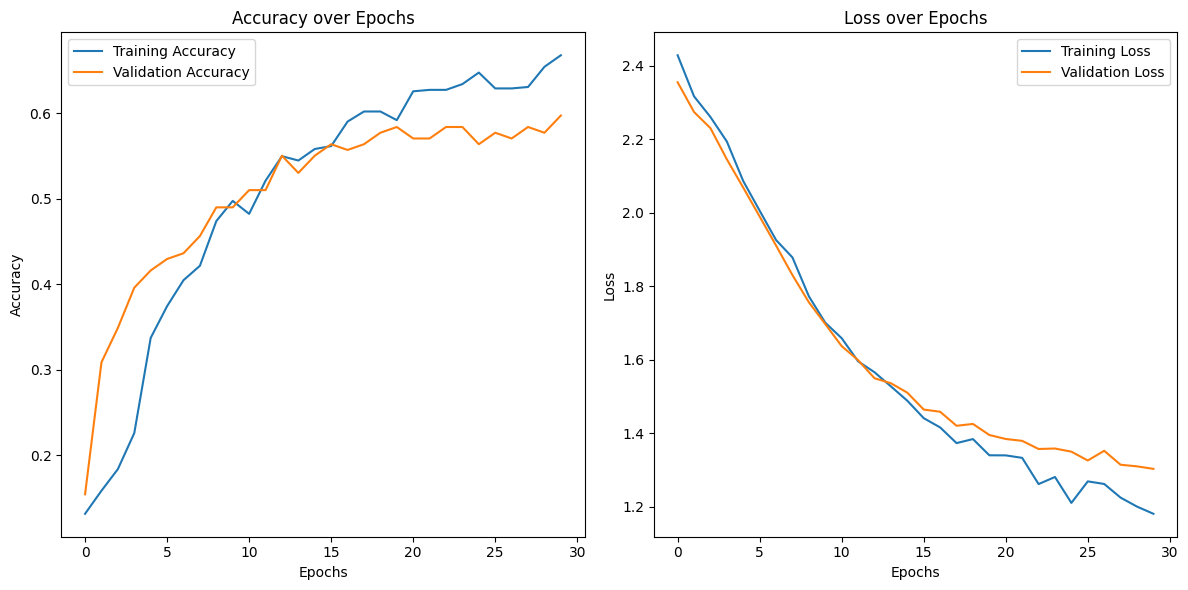

In [15]:
# Plot the training and validation accuracy
plt.figure(figsize=(12, 6))

# Training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()

In [16]:
model.save('resume_classification_model.keras')

np.save('label_encoder_classes.npy', label_encoder.classes_)
